# Visualization of data structures
5 Visual Displays of How Different Data Structures Work

#Stack

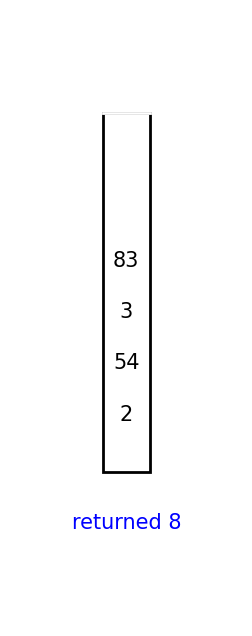

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize the stack
stack_contents = []
MAX_SIZE = 5  # Define a maximum size for the stack

# Function to draw the stack
def draw_stack(stack_contents, output=None, error_message=None):
    fig, ax = plt.subplots(figsize=(3, 8), facecolor='white')  # Adjust the width of the figure

    # Draw the stack container (without the top border)
    ax.add_patch(patches.Rectangle((0.4, 0.1), 0.2, 0.7, fill=None, edgecolor='black', lw=2))
    ax.plot([0.4, 0.6], [0.8, 0.8], color='white', linewidth=2)  # Hide the top line

    # Draw the stack items starting from the bottom of the rectangle
    for i, item in enumerate(stack_contents):
        ax.text(0.5, 0.2 + 0.1 * i, str(item), fontsize=15, ha='center')

    # Fix the text position to be below the stack
    if output is not None:
        ax.text(0.5, 0, f"returned {output}", fontsize=15, ha='center', va='center', color='blue')

    if error_message is not None:
        ax.text(0.5, -0.05, f"Error: {error_message}", fontsize=15, ha='center', va='center', color='red')

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.2, 1)  # Adjust the y-limit to fit the message below the stack
    ax.axis('off')
    plt.show()

# Function to handle push operation
def push_item(change):
    item = item_input.value
    if len(stack_contents) >= MAX_SIZE:
        update_display(error_message="Stack is full. Cannot push more items.")
    elif item.isdigit():
        stack_contents.append(int(item))
        item_input.value = ""  # Clear the input box after pushing
        update_display()
    else:
        update_display(error_message="Please enter a valid integer.")

# Function to handle pop operation
def pop_item(change):
    if stack_contents:
        popped_item = stack_contents.pop()
        update_display(popped_item)
    else:
        update_display(error_message="Stack is empty. Cannot pop.")

# Function to handle MakeEmpty operation
def make_empty(change):
    stack_contents.clear()
    update_display()

# Function to handle IsEmpty operation
def is_empty(change):
    if not stack_contents:
        update_display(popped_item="True")  # Return True when stack is empty
    else:
        update_display(popped_item="False")  # Return False when stack is not empty

# Function to update the display
def update_display(popped_item=None, error_message=None):
    clear_output(wait=True)
    draw_stack(stack_contents, output=popped_item, error_message=error_message)
    display(ui)

# UI elements
item_input = widgets.Text(description="Item:")
push_button = widgets.Button(description="Push")
pop_button = widgets.Button(description="Pop")
make_empty_button = widgets.Button(description="MakeEmpty")
is_empty_button = widgets.Button(description="IsEmpty")

# Event listeners
push_button.on_click(push_item)
pop_button.on_click(pop_item)
make_empty_button.on_click(make_empty)
is_empty_button.on_click(is_empty)

# Layout of UI elements
ui = widgets.VBox([item_input, push_button, pop_button, make_empty_button, is_empty_button])

# Initial display
update_display()



#Hash Table (with open address)

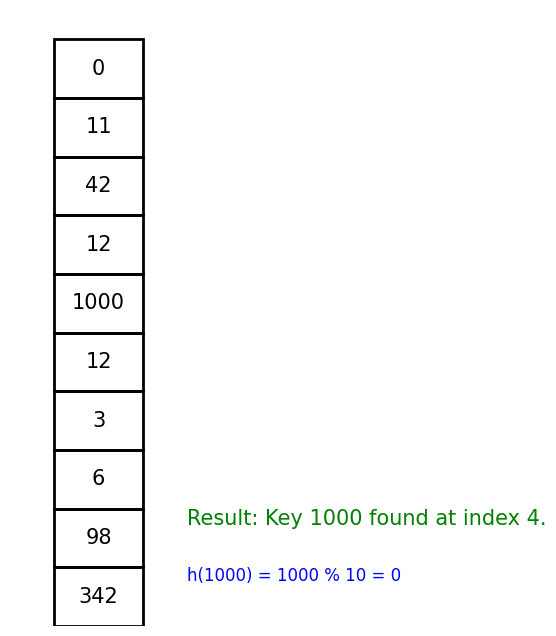

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the size of the hash table
HASH_TABLE_SIZE = 10
hash_table = [None] * HASH_TABLE_SIZE

# Hash function (simple modulus-based hash function)
def hash_function(key):
    return key % HASH_TABLE_SIZE

# Function to draw the hash table vertically
def draw_hash_table(output=None, error_message=None, hash_function_text=None):
    fig, ax = plt.subplots(figsize=(4, 8), facecolor='white')

    # Draw the hash table slots vertically
    for i in range(HASH_TABLE_SIZE):
        ax.add_patch(patches.Rectangle((0, i), 1, 1, fill=None, edgecolor='black', lw=2))
        ax.text(0.5, i + 0.5, str(hash_table[i]) if hash_table[i] is not None else "",
                fontsize=15, ha='center', va='center')

    # Display hash function text and results to the right of the hash table
    if hash_function_text:
        ax.text(1.5, HASH_TABLE_SIZE - 1, hash_function_text, fontsize=12, ha='left', va='top', color='blue')

    if output is not None:
        ax.text(1.5, HASH_TABLE_SIZE - 2, f"Result: {output}", fontsize=15, ha='left', va='top', color='green')

    if error_message is not None:
        ax.text(1.5, HASH_TABLE_SIZE - 2, f"Error: {error_message}", fontsize=15, ha='left', va='top', color='red')

    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, HASH_TABLE_SIZE)
    ax.axis('off')
    plt.gca().invert_yaxis()  # Flip the y-axis so that the first slot is at the top
    plt.show()

# Insert function using open addressing (linear probing)
def insert_item(change):
    key = key_input.value
    if not key.isdigit():
        update_display(error_message="Please enter a valid integer.")
        key_input.value = ''  # Clear input field
        return

    key = int(key)
    index = hash_function(key)
    hash_function_text = f"h({key}) = {key} % {HASH_TABLE_SIZE} = {index}"

    original_index = index
    explanation = f"Key {key} hashed to index {index}."

    while hash_table[index] is not None:
        explanation = f"Collision at index {index}. Probing to next slot."
        index = (index + 1) % HASH_TABLE_SIZE
        if index == original_index:
            update_display(error_message="Hash table is full!", hash_function_text=hash_function_text)
            key_input.value = ''  # Clear input field
            return

    hash_table[index] = key
    update_display(output=f"Inserted key {key} at index {index}.", hash_function_text=hash_function_text)
    key_input.value = ''  # Clear input field

# Find function (linear probing)
def find_item(change):
    key = key_input.value
    if not key.isdigit():
        update_display(error_message="Please enter a valid integer.")
        key_input.value = ''  # Clear input field
        return

    key = int(key)
    index = hash_function(key)
    hash_function_text = f"h({key}) = {key} % {HASH_TABLE_SIZE} = {index}"

    original_index = index

    while hash_table[index] != key:
        if hash_table[index] is None:
            update_display(error_message=f"Key {key} not found.", hash_function_text=hash_function_text)
            key_input.value = ''  # Clear input field
            return

        index = (index + 1) % HASH_TABLE_SIZE
        if index == original_index:
            update_display(error_message=f"Key {key} not found after probing.", hash_function_text=hash_function_text)
            key_input.value = ''  # Clear input field
            return

    update_display(output=f"Key {key} found at index {index}.", hash_function_text=hash_function_text)
    key_input.value = ''  # Clear input field

# Delete function (linear probing)
def delete_item(change):
    key = key_input.value
    if not key.isdigit():
        update_display(error_message="Please enter a valid integer.")
        key_input.value = ''  # Clear input field
        return

    key = int(key)
    index = hash_function(key)
    hash_function_text = f"h({key}) = {key} % {HASH_TABLE_SIZE} = {index}"

    original_index = index

    while hash_table[index] != key:
        if hash_table[index] is None:
            update_display(error_message=f"Key {key} not found.", hash_function_text=hash_function_text)
            key_input.value = ''  # Clear input field
            return

        index = (index + 1) % HASH_TABLE_SIZE
        if index == original_index:
            update_display(error_message=f"Key {key} not found after probing.", hash_function_text=hash_function_text)
            key_input.value = ''  # Clear input field
            return

    hash_table[index] = None
    update_display(output=f"Deleted key {key} from index {index}.", hash_function_text=hash_function_text)
    key_input.value = ''  # Clear input field

# MakeEmpty function
def make_empty(change):
    global hash_table
    hash_table = [None] * HASH_TABLE_SIZE
    update_display(output="Hash table cleared.")
    key_input.value = ''  # Clear input field

# Update the display
def update_display(output=None, error_message=None, hash_function_text=None):
    clear_output(wait=True)
    draw_hash_table(output=output, error_message=error_message, hash_function_text=hash_function_text)
    display(ui)

# UI elements
key_input = widgets.Text(description="Key:")
insert_button = widgets.Button(description="Insert")
find_button = widgets.Button(description="Find")
delete_button = widgets.Button(description="Delete")
make_empty_button = widgets.Button(description="Make Empty")

# Event listeners
insert_button.on_click(insert_item)
find_button.on_click(find_item)
delete_button.on_click(delete_item)
make_empty_button.on_click(make_empty)

# Layout of UI elements
ui = widgets.VBox([key_input, insert_button, find_button, delete_button, make_empty_button])

# Initial display
update_display()


#Hash Table (with chaining)

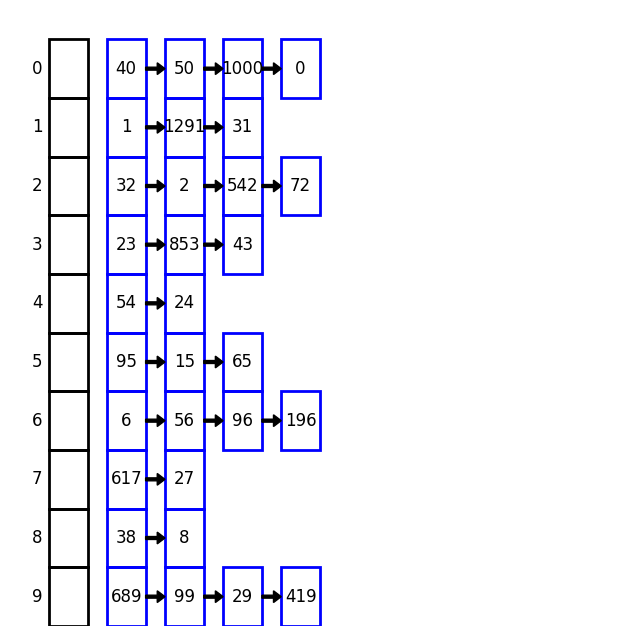

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the size of the hash table
HASH_TABLE_SIZE = 10
hash_table = [[] for _ in range(HASH_TABLE_SIZE)]  # Each bucket is a list for chaining

# Hash function (simple modulus-based hash function)
def hash_function(key):
    return key % HASH_TABLE_SIZE

# Function to draw the hash table with chaining (displaying each list node as a separate rectangle with links and arrows)
def draw_hash_table():
    fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')

    # Draw the hash table slots with separate rectangles for each node in the chain
    for i in range(HASH_TABLE_SIZE):
        # Draw the main slot rectangle for each index
        ax.add_patch(patches.Rectangle((0, i), 1, 1, fill=None, edgecolor='black', lw=2))
        ax.text(-0.3, i + 0.5, f"{i}", fontsize=12, ha='center', va='center')  # Label index

        # Draw linked list nodes horizontally with space between each node
        for j, key in enumerate(hash_table[i]):
            x_position = 1.5 + j * 1.5  # Add space between nodes
            ax.add_patch(patches.Rectangle((x_position, i), 1, 1, fill=None, edgecolor='blue', lw=2))
            ax.text(x_position + 0.5, i + 0.5, str(key), fontsize=12, ha='center', va='center')

            # Draw a line with an arrow to represent links between nodes
            if j > 0:
                start_x = 1.5 + (j - 1) * 1.5 + 1  # Right edge of previous node
                end_x = x_position  # Left edge of current node
                ax.add_patch(patches.FancyArrow(start_x, i + 0.5, end_x - start_x - 0.2, 0,
                                                width=0.05, head_width=0.2, head_length=0.2, color="black"))

    ax.set_xlim(-1, 15)
    ax.set_ylim(-0.5, HASH_TABLE_SIZE)
    ax.axis('off')
    plt.gca().invert_yaxis()  # Flip the y-axis so that the first slot is at the top
    plt.show()

# Insert function using chaining
def insert_item(change):
    key = key_input.value
    if not key.isdigit():
        display_message("Please enter a valid integer.", "red")
        key_input.value = ''  # Clear input field
        return

    key = int(key)
    index = hash_function(key)
    hash_function_text = f"h({key}) = {key} % {HASH_TABLE_SIZE} = {index}"

    if key not in hash_table[index]:
        hash_table[index].append(key)
        display_message(f"Inserted key {key} at index {index}.", "green", hash_function_text)
    else:
        display_message(f"Key {key} already exists at index {index}.", "red", hash_function_text)

    key_input.value = ''  # Clear input field

# Find function using chaining
def find_item(change):
    key = key_input.value
    if not key.isdigit():
        display_message("Please enter a valid integer.", "red")
        key_input.value = ''  # Clear input field
        return

    key = int(key)
    index = hash_function(key)
    hash_function_text = f"h({key}) = {key} % {HASH_TABLE_SIZE} = {index}"

    if key in hash_table[index]:
        display_message(f"Key {key} found at index {index}.", "green", hash_function_text)
    else:
        display_message(f"Key {key} not found.", "red", hash_function_text)

    key_input.value = ''  # Clear input field

# Delete function using chaining
def delete_item(change):
    key = key_input.value
    if not key.isdigit():
        display_message("Please enter a valid integer.", "red")
        key_input.value = ''  # Clear input field
        return

    key = int(key)
    index = hash_function(key)
    hash_function_text = f"h({key}) = {key} % {HASH_TABLE_SIZE} = {index}"

    if key in hash_table[index]:
        hash_table[index].remove(key)
        display_message(f"Deleted key {key} from index {index}.", "green", hash_function_text)
    else:
        display_message(f"Key {key} not found.", "red", hash_function_text)

    key_input.value = ''  # Clear input field

# MakeEmpty function
def make_empty(change):
    global hash_table
    hash_table = [[] for _ in range(HASH_TABLE_SIZE)]
    display_message("Hash table cleared.", "green")
    key_input.value = ''  # Clear input field

# Update the display
def update_display():
    clear_output(wait=True)
    draw_hash_table()
    display(ui)

# Display messages next to the buttons
def display_message(message, color="black", hash_function_text=None):
    message_output.clear_output()
    with message_output:
        display(widgets.HTML(f"<p style='color:{color}; font-size:18px; font-weight:bold;'>{message}</p>"))
    hash_output.clear_output()
    if hash_function_text:
        with hash_output:
            display(widgets.HTML(f"<p style='color:blue; font-size:16px;'>{hash_function_text}</p>"))
    update_display()

# UI elements
key_input = widgets.Text(description="Key:")
insert_button = widgets.Button(description="Insert")
find_button = widgets.Button(description="Find")
delete_button = widgets.Button(description="Delete")
make_empty_button = widgets.Button(description="Make Empty")

# Message outputs
message_output = widgets.Output()
hash_output = widgets.Output()

# Event listeners
insert_button.on_click(insert_item)
find_button.on_click(find_item)
delete_button.on_click(delete_item)
make_empty_button.on_click(make_empty)

# Layout of UI elements
ui = widgets.VBox([
    key_input,
    widgets.HBox([insert_button, find_button, delete_button, make_empty_button]),
    message_output,  # Display result or error messages here
    hash_output  # Display hash function calculation here
])

# Initial display
update_display()


#Hash Table (A question from a test)

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
import ipywidgets.widgets as wg
from collections import deque

class HashTableWithOpenAddressing:
    def __init__(self, size=10):
        self.size = size
        self.table = [None] * self.size
        self.queue = deque(maxlen=size)  # Queue to track the order of elements

    def hash_function(self, key):
        return key % self.size

    def insert(self, key):
        if key in self.queue:
            display_message(f"Key {key} already exists in the table.", "blue")
            return

        # Remove the oldest element from the queue and table if full
        if len(self.queue) == self.size:
            oldest_key = self.queue.pop()  # Remove the oldest key
            # Find and remove the oldest key in the table
            idx = self.hash_function(oldest_key)
            while self.table[idx] != oldest_key:
                idx = (idx + 1) % self.size
            self.table[idx] = None

        # Insert the new key
        idx = self.hash_function(key)
        while self.table[idx] is not None:
            idx = (idx + 1) % self.size  # Linear probing
        self.table[idx] = key
        self.queue.appendleft(key)

    def delete(self, key):
        if key not in self.queue:
            return False

        self.queue.remove(key)
        idx = self.hash_function(key)
        while self.table[idx] != key:
            idx = (idx + 1) % self.size
        self.table[idx] = None
        return True

    def find(self, key):
        idx = self.hash_function(key)
        original_idx = idx
        while self.table[idx] is not None:
            if self.table[idx] == key:
                return idx
            idx = (idx + 1) % self.size
            if idx == original_idx:
                break
        return None

    def make_empty(self):
        self.table = [None] * self.size
        self.queue.clear()

    def visualize(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.axis("off")

        # Draw Hash Table on the left
        ax.text(0.2, 1, "Hash Table", ha="center", va="top", fontweight="bold")
        for i in range(self.size):
            y = 0.9 - i * 0.1
            ax.text(0.1, y, f"{i}", ha="center", va="center", fontweight="bold")
            content = f"{self.table[i]}" if self.table[i] is not None else ""
            ax.text(0.2, y, content, ha="center", va="center", color="black",
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="none"))

        # Draw Queue on the right
        ax.text(0.6, 1, "Queue", ha="center", va="top", fontweight="bold")
        for i in range(self.size):
            x = 0.5 + i * 0.1
            ax.text(x, 0.9, f"{i}", ha="center", va="center", fontweight="bold")
            if i < len(self.queue):
                k = self.queue[i]
                ax.text(x, 0.8, f"{k}", ha="center", va="center", color="green",
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="none"))
            else:
                ax.text(x, 0.8, "", ha="center", va="center",
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="none"))

        plt.show()

# Instantiate the hash table
hash_table = HashTableWithOpenAddressing()

# Output area for visualization and messages
output_area = wg.Output()
message_area = wg.Output()

# Helper function to display messages
def display_message(message, color="red"):
    with message_area:
        clear_output(wait=True)
        display(widgets.HTML(f"<p style='font-size:20px; color:{color}; font-weight:bold;'>{message}</p>"))

# Button event handlers
def on_insert(b):
    with message_area:
        clear_output(wait=True)
    if not insert_key.value:
        display_message("Please enter a key to insert.")
        return
    try:
        key = int(insert_key.value)
        hash_table.insert(key)
        with output_area:
            clear_output(wait=True)
            hash_table.visualize()
        insert_key.value = ''
    except ValueError:
        display_message("Invalid input. Please enter an integer.")

def on_delete(b):
    with message_area:
        clear_output(wait=True)
    if not delete_key.value:
        display_message("Please enter a key to delete.")
        return
    try:
        key = int(delete_key.value)
        if not hash_table.delete(key):
            display_message("Key not found.")
        with output_area:
            clear_output(wait=True)
            hash_table.visualize()
        delete_key.value = ''
    except ValueError:
        display_message("Invalid input. Please enter an integer.")

def on_find(b):
    with message_area:
        clear_output(wait=True)
    if not find_key.value:
        display_message("Please enter a key to find.")
        return
    try:
        key = int(find_key.value)
        index = hash_table.find(key)
        if index is not None:
            display_message(f"Key {key} found in the table at index {index}.", "green")
        else:
            display_message("Key not found.")
        with output_area:
            clear_output(wait=True)
            hash_table.visualize()
        find_key.value = ''
    except ValueError:
        display_message("Invalid input. Please enter an integer.")

def on_make_empty(b):
    with message_area:
        clear_output(wait=True)
    hash_table.make_empty()
    display_message("The hash table and queue have been emptied.", "blue")
    with output_area:
        clear_output(wait=True)
        hash_table.visualize()

# UI elements
insert_key = widgets.Text(description="Insert Key")
insert_button = widgets.Button(description="Insert")
insert_button.on_click(on_insert)

delete_key = widgets.Text(description="Delete Key")
delete_button = widgets.Button(description="Delete")
delete_button.on_click(on_delete)

find_key = widgets.Text(description="Find Key")
find_button = widgets.Button(description="Find")
find_button.on_click(on_find)

make_empty_button = widgets.Button(description="Make Empty")
make_empty_button.on_click(on_make_empty)

# Display UI
display(widgets.VBox([insert_key, insert_button, delete_key, delete_button, find_key, find_button, make_empty_button, message_area, output_area]))

# Initial visualization
with output_area:
    hash_table.visualize()


# Algorithm illustration: reconstructing a BST from its Preorder scan

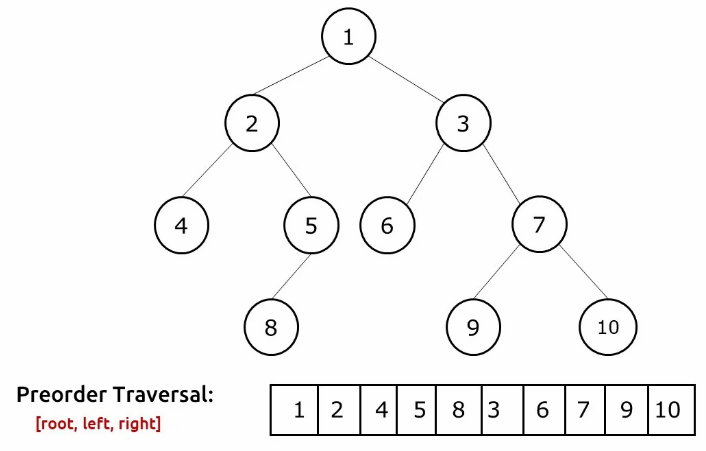

In [ ]:
import time
from graphviz import Digraph
from IPython.display import display, HTML, Image
import ipywidgets as widgets
from IPython.display import clear_output

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key

def is_valid_preorder(preorder):
    stack = []
    root = float('-inf')

    for value in preorder:
        if value < root:
            return False
        while stack and stack[-1] < value:
            root = stack.pop()
        stack.append(value)

    return True

def build_bst(preorder):
    def add_node(dot, parent, child, direction):
        dot.node(str(child), str(child))
        if direction == "left":
            dot.edge(str(parent), str(child), label="L")
        else:
            dot.edge(str(parent), str(child), label="R")

    if not preorder:
        return None, None

    root = Node(preorder[0])
    dot = Digraph(format='png')
    dot.node(str(root.value))

    def recursive_build_bst(node, preorder, start, end, dot):
        if start >= end:
            return None

        root_val = preorder[start]
        node = Node(root_val)
        dot.node(str(root_val))
        index = start + 1

        while index < end and preorder[index] < root_val:
            index += 1

        left, right = None, None
        if start + 1 < index:
            left, _ = recursive_build_bst(node.left, preorder, start + 1, index, dot)
            if left:
                add_node(dot, root_val, left.value, "left")

        if index < end:
            right, _ = recursive_build_bst(node.right, preorder, index, end, dot)
            if right:
                add_node(dot, root_val, right.value, "right")

        return node, dot

    bst_root, dot = recursive_build_bst(root, preorder, 0, len(preorder), dot)
    dot.render("bst")
    return bst_root

def ask_for_input():
    input_box = widgets.Text(
        placeholder="Enter Preorder traversal...",
        description="Input:",
        style={'description_width': 'initial'}
    )
    submit_button = widgets.Button(description="Submit")
    output = widgets.Output()

    display(input_box, submit_button, output)

    def on_submit_clicked(b):
        with output:
            output.clear_output()  # Clear the output area before displaying the result
            try:
                # Check if the input is empty
                if not input_box.value.strip():
                    display(HTML("<p style='color:red; font-size:16px; font-weight:bold;'>Error: No input entered. Please enter a valid preorder traversal.</p>"))
                    input_box.value = ''  # Clear input box
                    return

                preorder = list(map(int, input_box.value.split()))

                if not is_valid_preorder(preorder):
                    display(HTML("<p style='color:red; font-size:16px; font-weight:bold;'>Error: The input is not a valid Preorder traversal for a Binary Search Tree. Please try again.</p>"))
                    input_box.value = ''  # Clear input box
                else:
                    build_bst(preorder)
                    display(Image("bst.png"))
                    ask_for_retry()
            except ValueError:
                display(HTML("<p style='color:red; font-size:16px; font-weight:bold;'>Error: Please enter integers separated by spaces. Try again.</p>"))
                input_box.value = ''  # Clear input box

    submit_button.on_click(on_submit_clicked)

def ask_for_retry():
    print("\nWould you like to try another input?")
    yes_button = widgets.Button(description="Yes")
    no_button = widgets.Button(description="No")
    output = widgets.Output()

    display(widgets.HBox([yes_button, no_button]), output)

    def on_yes_clicked(b):
        output.clear_output()
        ask_for_input()

    def on_no_clicked(b):
        output.clear_output()
        display(HTML("<h3>Thank you for using the BST builder! 😊</h3>"))

    yes_button.on_click(on_yes_clicked)
    no_button.on_click(on_no_clicked)

def main():
    explanation = (
        "In a preorder scan, a BST is read by starting at the root, \n then the left subtree (with numbers smaller than the root), \n "
        "and finally the right subtree (with numbers larger than the root).\n This pattern is followed for each subtree in the tree.\n\n"
        "Enter a preorder scan: "
    )


    type_out_text(explanation)
    ask_for_input()

def type_out_text(text, delay=0.01, newline_delay=0.5):  # Added a parameter for longer delay on newline
    for char in text:
        print(char, end='', flush=True)
        if char == '\n':
            time.sleep(newline_delay)  # Longer delay for newline characters
        else:
            time.sleep(delay)  # Regular delay for other characters
    print()  # Move to the next line after the text is printed



if __name__ == "__main__":  # Corrected __name__ check
    main()


In a preorder scan, a BST is read by starting at the root, 
 then the left subtree (with numbers smaller than the root), 
 and finally the right subtree (with numbers larger than the root).
 This pattern is followed for each subtree in the tree.

Enter a preorder scan: 


Text(value='', description='Input:', placeholder='Enter Preorder traversal...', style=DescriptionStyle(descrip…

Button(description='Submit', style=ButtonStyle())

Output()

Text(value='', description='Input:', placeholder='Enter Preorder traversal...', style=DescriptionStyle(descrip…

Button(description='Submit', style=ButtonStyle())

Output()

Text(value='', description='Input:', placeholder='Enter Preorder traversal...', style=DescriptionStyle(descrip…

Button(description='Submit', style=ButtonStyle())

Output()